In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections

In [178]:
def bar_single(x):
    counts = collections.Counter(x)
    plt.bar(list(counts.keys()), list(counts.values()))
def get_ax(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    return ax

In [76]:
df = pd.read_csv('../data_sets/churn.txt')

In [77]:
df['Churn?'] = df['Churn?'].str.contains('True')

In [93]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [113]:
df[['Churn?', 'Int\'l Plan']].groupby(['Churn?']).count()

,Int'l Plan
Churn?,
False,2850
True,483


In [140]:
counts = pd.crosstab(df['Churn?'], df['Int\'l Plan'])
counts

Int'l Plan,no,yes
Churn?,,
False,2664,186
True,346,137


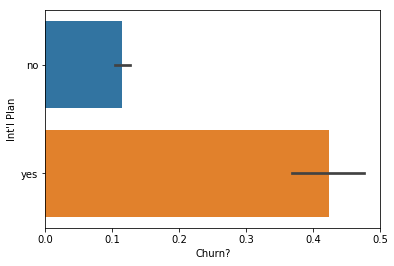

In [146]:
sns.barplot(data=df, x='Churn?', y='Int\'l Plan')

In [182]:
col1 =  counts.columns[0]
col2 =  counts.columns[1]
ax.bar(counts.index, counts[col1]+counts[col2], label=col2)
ax.bar(counts.index, counts[col1], label=col1)
ax.set_xticks([0, 1])
ax.set_xticklabels(counts.index)
ax.set_ylabel('Count')
ax.legend()

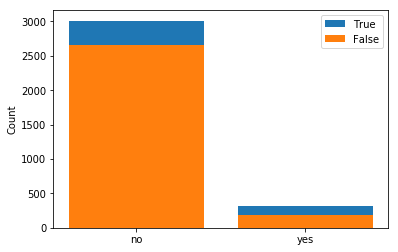

In [181]:
ax = get_ax()
ax.bar(counts.index, counts.iloc[0, :]+counts.iloc[1,:], label=counts.index[1])
ax.bar(counts.index, counts.iloc[0, :], label=counts.index[0])
ax.set_xticks([0, 1])
ax.set_xticklabels(counts.columns)
ax.set_ylabel('Count')
ax.legend()

In [198]:
counts = pd.crosstab(df['Churn?'], df['Int\'l Plan'], margins=True, normalize=True)

In [199]:
counts

Int'l Plan,no,yes,All
Churn?,,,
False,0.79928,0.055806,0.855086
True,0.10381,0.041104,0.144914
All,0.90309,0.096910,1.000000
